In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import os.path as path
import numpy as np
import torch
from matplotlib.patches import Rectangle
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cv2
import random
import math
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import pandas as pd
from collections import Counter
from scipy.ndimage import convolve1d

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams["figure.autolayout"] = True
import sys
sys.path.append('../')
from utils import utils, RWSampler, Inference, dataloader

### DenseWeight

In [ ]:
RGB_train_DW = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_011_64_001_05_RGB_DW_Alpha1/011_64_001_05_RGB_DW_Alpha1_train.csv',  index_col=0) 
weights, dense = RWSampler.TargetRelevance(RGB_train_DW['ytrue'].values, alpha = 3.9).__call__(RGB_train_DW['ytrue'].values)

In [ ]:
#weights = 1/weights #np.where(weights >= 1, weights, 1)
weights = weights / np.max(weights)
newdf = pd.DataFrame()
newdf['ytrue']   = RGB_train_DW['ytrue']
newdf['weights'] = weights
weights_bins, ytrue_bins = Inference.return_samples_weight_per_bins(newdf)
_ = utils.triple_emp_effective_weights_hist_plot(ytrue_bins, ytrue_bins, weights_bins, method = 'dense weight') 

#### Comparison of the resuls based on different alpha values

In [11]:
RGB_test_DW_alphs1 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_011_64_001_05_RGB_DW_Alpha1/011_64_001_05_RGB_DW_Alpha1_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs1, th1 = 8, th2 = 22)
RGB_test_DW_alphs2  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_2/012_64_001_05_RGB_DW_Alpha_2_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs2, th1 = 8, th2 = 22)
RGB_test_DW_alphs3 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_3/012_64_001_05_RGB_DW_Alpha_3_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs3, th1 = 8, th2 = 22)
RGB_test_DW_alphs4  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_4/012_64_001_05_RGB_DW_Alpha_4_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs4, th1 = 8, th2 = 22)
RGB_test_DW_alphs5  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_5/012_64_001_05_RGB_DW_Alpha_5_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs5, th1 = 8, th2 = 22)
#RGB_test_DW_alphs10  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_011_64_001_05_RGB_DW_Alpha10/011_64_001_05_RGB_DW_Alpha10_test.csv',  index_col=0) 
#_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs10, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.88, MAPE = 0.14 | Cm: MAE = 1.59, MAPE = 11.93 | Cex: MAE = 5.25, MAPE = 32.39
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.06, MAPE = 0.16 | Cm: MAE = 1.85, MAPE = 14.60 | Cex: MAE = 4.52, MAPE = 26.71
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.26, MAPE = 0.18 | Cm: MAE = 2.28, MAPE = 18.80 | Cex: MAE = 1.99, MAPE = 13.10
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 4.45, MAPE = 0.36 | Cm: MAE = 4.67, MAPE = 37.21 | Cex: MAE = 1.84, MAPE = 15.47
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 4.75, MAPE = 0.38 | Cm: MAE = 4.98, MAPE = 39.80 | Cex: MAE = 2.12, MAPE = 14.89


In [12]:
RGB_test_DW_alphs1  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_011_64_001_05_RGB_DW_Alpha1/011_64_001_05_RGB_DW_Alpha1_test.csv',  index_col=0) 
RGB_test_cost_sensitive_Output1 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs1, th1 = 8, th2 = 22)
RGB_test_DW_alphs2  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_2/012_64_001_05_RGB_DW_Alpha_2_test.csv',  index_col=0) 
RGB_test_cost_sensitive_Output2 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs2, th1 = 8, th2 = 22)
RGB_test_DW_alphs3  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_3/012_64_001_05_RGB_DW_Alpha_3_test.csv',  index_col=0) 
RGB_test_cost_sensitive_Output3 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs3, th1 = 8, th2 = 22)
RGB_test_DW_alphs4  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_4/012_64_001_05_RGB_DW_Alpha_4_test.csv',  index_col=0) 
RGB_test_cost_sensitive_Output4 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs4, th1 = 8, th2 = 22)
RGB_test_DW_alphs5  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_DW_Alpha_5/012_64_001_05_RGB_DW_Alpha_5_test.csv',  index_col=0) 
RGB_test_cost_sensitive_Output5 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs5, th1 = 8, th2 = 22)
#RGB_test_DW_2  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_011_64_001_05_RGB_DW_Alpha_5/011_64_001_05_RGB_DW_Alpha_5_test.csv',  index_col=0) 
#RGB_test_cost_sensitive_Output = Inference.eval_on_three_main_label_range_pred(RGB_test_DW, th1 = 8, th2 = 22)

C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 1.88, MAPE = 0.14 | C1: MAE = 2.78, MAPE = 40.02 | C2: MAE = 1.59, MAPE = 11.93 | C3: MAE = 6.77, MAPE = 27.69
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 2.06, MAPE = 0.16 | C1: MAE = 2.11, MAPE = 30.46 | C2: MAE = 1.85, MAPE = 14.60 | C3: MAE = 6.00, MAPE = 24.41
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 2.26, MAPE = 0.18 | C1: MAE = 1.28, MAPE = 18.36 | C2: MAE = 2.28, MAPE = 18.80 | C3: MAE = 2.42, MAPE = 9.87
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield val

In [5]:
RGB_test_DW_alphs35 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_014_64_001_05_RGB_DW_Modified2_3hf/014_64_001_05_RGB_DW_Modified2_3hf_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs35, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.43, MAPE = 0.20 | Cm: MAE = 2.42, MAPE = 19.80 | Cex: MAE = 2.58, MAPE = 25.30


In [5]:
RGB_test_DW_alphs35 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_014_64_001_05_RGB_DW_Modified3_3hf/014_64_001_05_RGB_DW_Modified3_3hf_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs35, th1 = 8, th2 = 22)
RGB_test_cost_sensitive_Output5 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs35, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.67, MAPE = 0.12 | Cm: MAE = 1.56, MAPE = 11.68 | Cex: MAE = 2.90, MAPE = 21.49
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 1.67, MAPE = 0.12 | C1: MAE = 2.44, MAPE = 35.19 | C2: MAE = 1.56, MAPE = 11.68 | C3: MAE = 3.18, MAPE = 13.05


In [4]:
RGB_test_DW_alphs35 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_015_64_001_05_RGB_DW_M_3.2/015_64_001_05_RGB_DW_M_3.2_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs35, th1 = 8, th2 = 22)
RGB_test_cost_sensitive_Output5 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs35, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.07, MAPE = 0.16 | Cm: MAE = 1.92, MAPE = 15.17 | Cex: MAE = 3.90, MAPE = 29.07
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 2.07, MAPE = 0.16 | C1: MAE = 3.36, MAPE = 48.21 | C2: MAE = 1.92, MAPE = 15.17 | C3: MAE = 4.23, MAPE = 17.30


In [3]:
RGB_test_DW_alphs35 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_015_64_001_05_RGB_DW_M_3.3/015_64_001_05_RGB_DW_M_3.3_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs35, th1 = 8, th2 = 22)
RGB_test_cost_sensitive_Output5 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs35, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.70, MAPE = 0.13 | Cm: MAE = 1.53, MAPE = 11.73 | Cex: MAE = 3.63, MAPE = 23.41
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 1.70, MAPE = 0.13 | C1: MAE = 2.15, MAPE = 31.21 | C2: MAE = 1.53, MAPE = 11.73 | C3: MAE = 4.55, MAPE = 18.61


In [16]:
RGB_test_DW_alphs35 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_015_64_001_05_RGB_DW_M_3.4/015_64_001_05_RGB_DW_M_3.4_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs35, th1 = 9, th2 = 22)
RGB_test_cost_sensitive_Output5 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs35, th1 = 9, th2 = 22)

Majority range yield: 2777403 | Extreme yield value: 408005
All: MAE = 1.78, MAPE = 0.14 | Cm: MAE = 1.77, MAPE = 13.47 | Cex: MAE = 1.81, MAPE = 16.44
C1 num samples: 253247 | C2 num samples: 2777403 | C3 num samples: 154758 
C1 is yield value between 0 and 9, C2 is yield value between 9 and 22, and C3 is yield value bigger than 22
All: MAE = 1.78, MAPE = 0.14 | C1: MAE = 1.59, MAPE = 21.01 | C2: MAE = 1.77, MAPE = 13.47 | C3: MAE = 2.19, MAPE = 8.96


In [12]:
RGB_test_DW_alphs35 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_015_64_001_05_RGB_DW_M_3.9/015_64_001_05_RGB_DW_M_3.9_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs35, th1 = 9, th2 = 22)
RGB_test_cost_sensitive_Output5 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs35, th1 = 9, th2 = 22)

Majority range yield: 2777403 | Extreme yield value: 408005
All: MAE = 1.72, MAPE = 0.13 | Cm: MAE = 1.70, MAPE = 12.70 | Cex: MAE = 1.83, MAPE = 15.54
C1 num samples: 253247 | C2 num samples: 2777403 | C3 num samples: 154758 
C1 is yield value between 0 and 9, C2 is yield value between 9 and 22, and C3 is yield value bigger than 22
All: MAE = 1.72, MAPE = 0.13 | C1: MAE = 1.42, MAPE = 18.73 | C2: MAE = 1.70, MAPE = 12.70 | C3: MAE = 2.51, MAPE = 10.31


In [4]:
RGB_test_DW_alphs39 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_016_64_001_05_WD_Resample_3.9_huberLoss/016_64_001_05_WD_Resample_3.9_huberLoss_test.csv',  index_col=0) 
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_DW_alphs39, th1 = 9, th2 = 22)
RGB_test_cost_sensitive_Output5 = Inference.eval_on_three_main_label_range_pred(RGB_test_DW_alphs39, th1 = 9, th2 = 22)

Majority range yield: 2457497 | Extreme yield value: 727911
All: MAE = 1.52, MAPE = 0.11 | Cm: MAE = 1.56, MAPE = 11.04 | Cex: MAE = 1.40, MAPE = 9.91
C1 num samples: 298584 | C2 num samples: 2457497 | C3 num samples: 429327 
C1 is yield value between 0 and 9, C2 is yield value between 9 and 22, and C3 is yield value bigger than 22
All: MAE = 1.52, MAPE = 0.11 | C1: MAE = 1.14, MAPE = 14.87 | C2: MAE = 1.56, MAPE = 11.04 | C3: MAE = 1.58, MAPE = 6.46


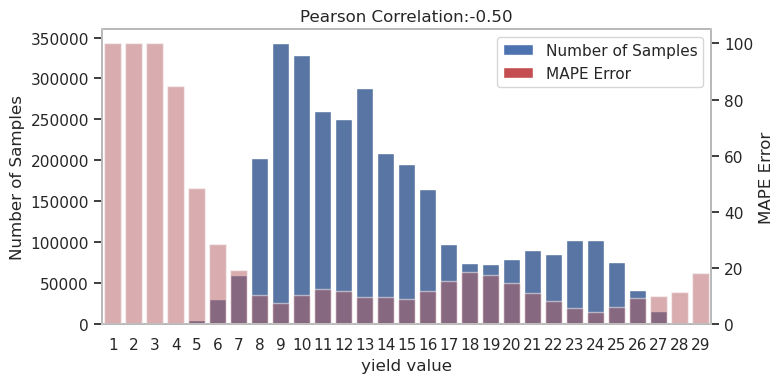

In [4]:
_ = Inference.Erroe_hist_visulization_V2(RGB_test_DW_alphs35)

In [21]:
df1 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_test.csv',  
                                    index_col=0)

df2 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_016_64_001_05_WD_Resample_3.9_huberLoss/016_64_001_05_WD_Resample_3.9_huberLoss_test.csv',  
                  index_col=0) 

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.patches as  mpatches

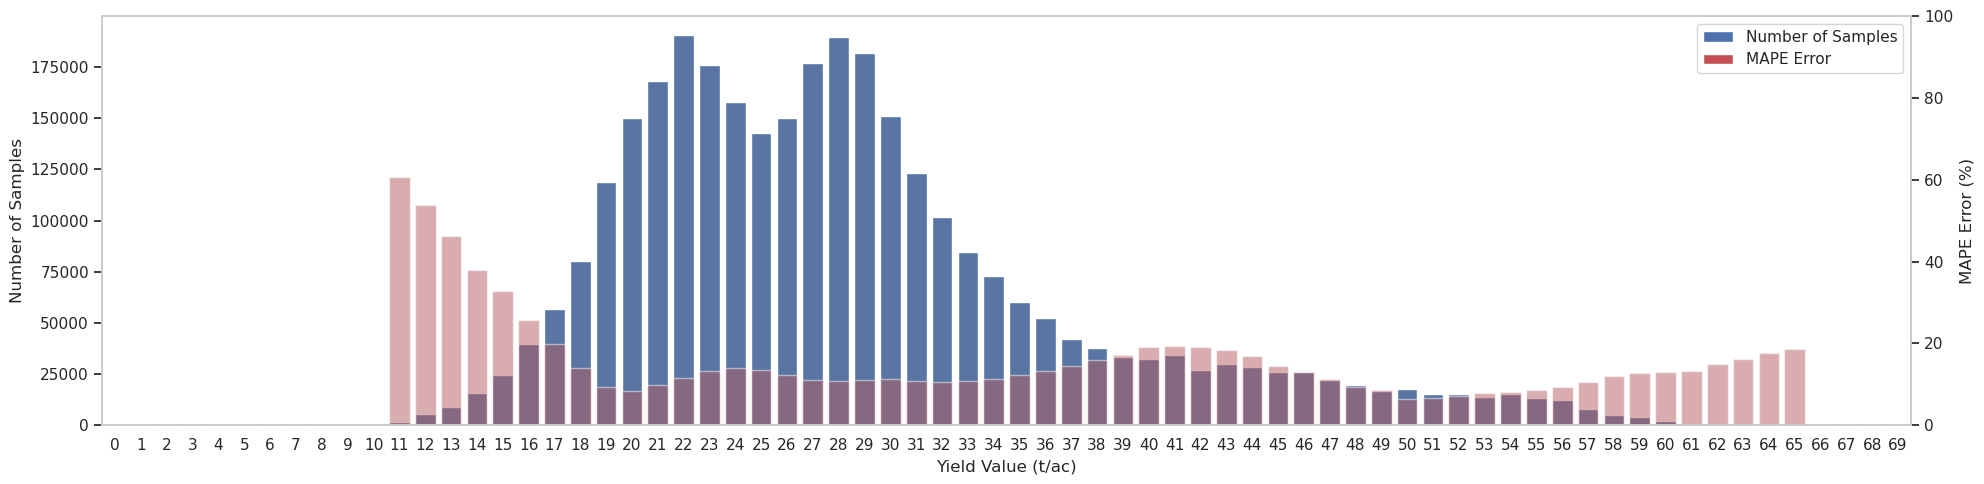

In [44]:
fig, axs = plt.subplots(1, 1 , figsize = (20, 5))

sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams["figure.autolayout"] = True
plt.subplots_adjust(hspace = 0.01)

MAPE_Errors, counts = [], []

for i in range(1, 71):
    if i == 1:
        Data  = df2.loc[((df2['ytrue']*2.2417) < (i+1))]
        d1    = df1.loc[((df1['ytrue']*2.2417) < (i+1))]
    elif i == 70: 
        Data  = df2.loc[((df2['ytrue']*2.2417) >= (i))]
        d1    = df1.loc[((df1['ytrue']*2.2417) >= (i))]
    else: 
        Data  = df2.loc[((df2['ytrue']*2.2417) >= i) & (df2['ytrue']*2.2417 < (i+1))] 
        d1    = df1.loc[((df1['ytrue']*2.2417) >= i) & (df1['ytrue']*2.2417 < (i+1))] 

    counts.append(len(Data))
    if len(Data) == 0: 
        MAPE = 0    
    else: 
        MAPE = mean_absolute_percentage_error(Data['ytrue'], Data['ypred_w15'])
    if MAPE > 0.7: 
        MAPE = 0
    MAPE_Errors.append(MAPE*100)

bins_value  = np.arange(0, 70, 1)

ax1  = sns.barplot(x = bins_value, y= counts, color = sns.color_palette()[0],  ax = axs) #width = 0.9,
axs01 = axs.twinx()
ax01 = sns.barplot(x = bins_value, y= MAPE_Errors, color = sns.color_palette()[3], alpha = 0.5, ax = axs01)


handles = [mpatches.Patch(facecolor = sns.color_palette()[0], label = 'Number of Samples'),
mpatches.Patch(facecolor = sns.color_palette()[3], label = 'MAPE Error')
]
axs.legend(handles = handles, loc = 'upper right')

ax1.set(ylabel='Number of Samples')
ax01.set(ylabel='MAPE Error (%)')
ax01.set_ylim(0, 100)
ax1.set(xlabel='Yield Value (t/ac)')
#plt.title(r"Pearson Correlation:{:.2f}".format(pearson_value))

None

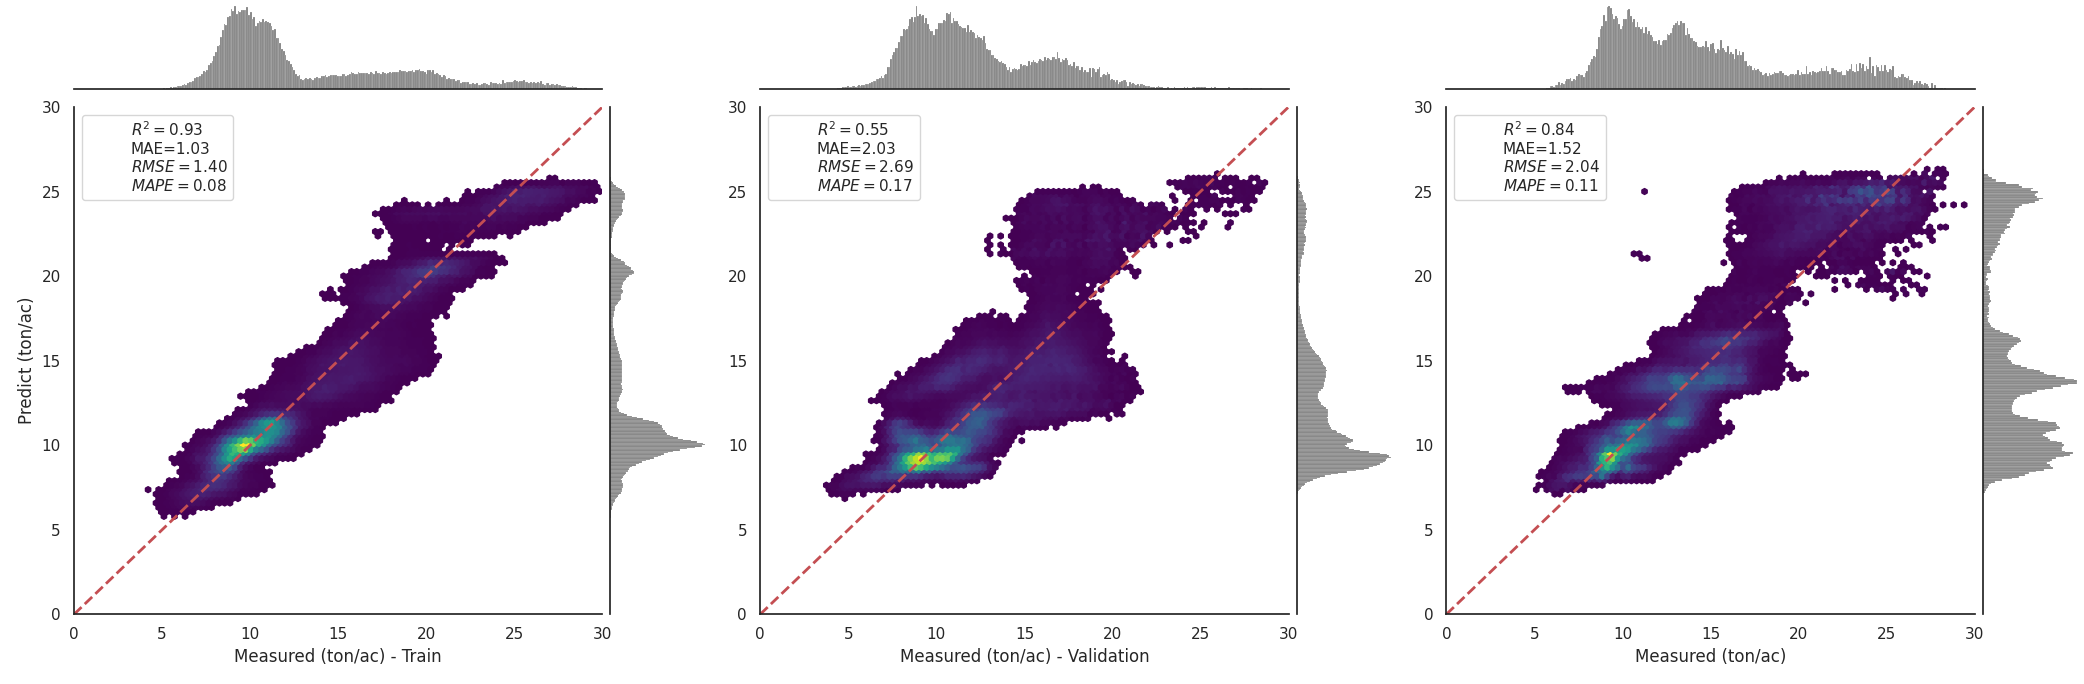

In [4]:
RGB_train_cost_sensitive  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_016_64_001_05_WD_Resample_3.9_huberLoss/016_64_001_05_WD_Resample_3.9_huberLoss_train.csv',  index_col=0) 
RGB_valid_cost_sensitive  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_016_64_001_05_WD_Resample_3.9_huberLoss/016_64_001_05_WD_Resample_3.9_huberLoss_valid.csv',  index_col=0) 
RGB_test_cost_sensitive   = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_016_64_001_05_WD_Resample_3.9_huberLoss/016_64_001_05_WD_Resample_3.9_huberLoss_test.csv',  index_col=0) 
_ = Inference.train_val_test_satterplot(RGB_train_cost_sensitive, RGB_valid_cost_sensitive, RGB_test_cost_sensitive, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

### LDS

In [18]:
df = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_005_001_05_RGB_inv_LDS/coords/train.csv', index_col= 0)
weights, labels_, effective_value, emperical_values, avg_weights = RWSampler.check_lds_reweighting_(df, 
                                                                    rw_method = 'inverse', 
                                                                    lds_ks = 20, 
                                                                    lds_sigma = 4).return_pixelwise_weight()

In [19]:
len(avg_weights)

70

Text(0.5, 1.0, 'Weights')

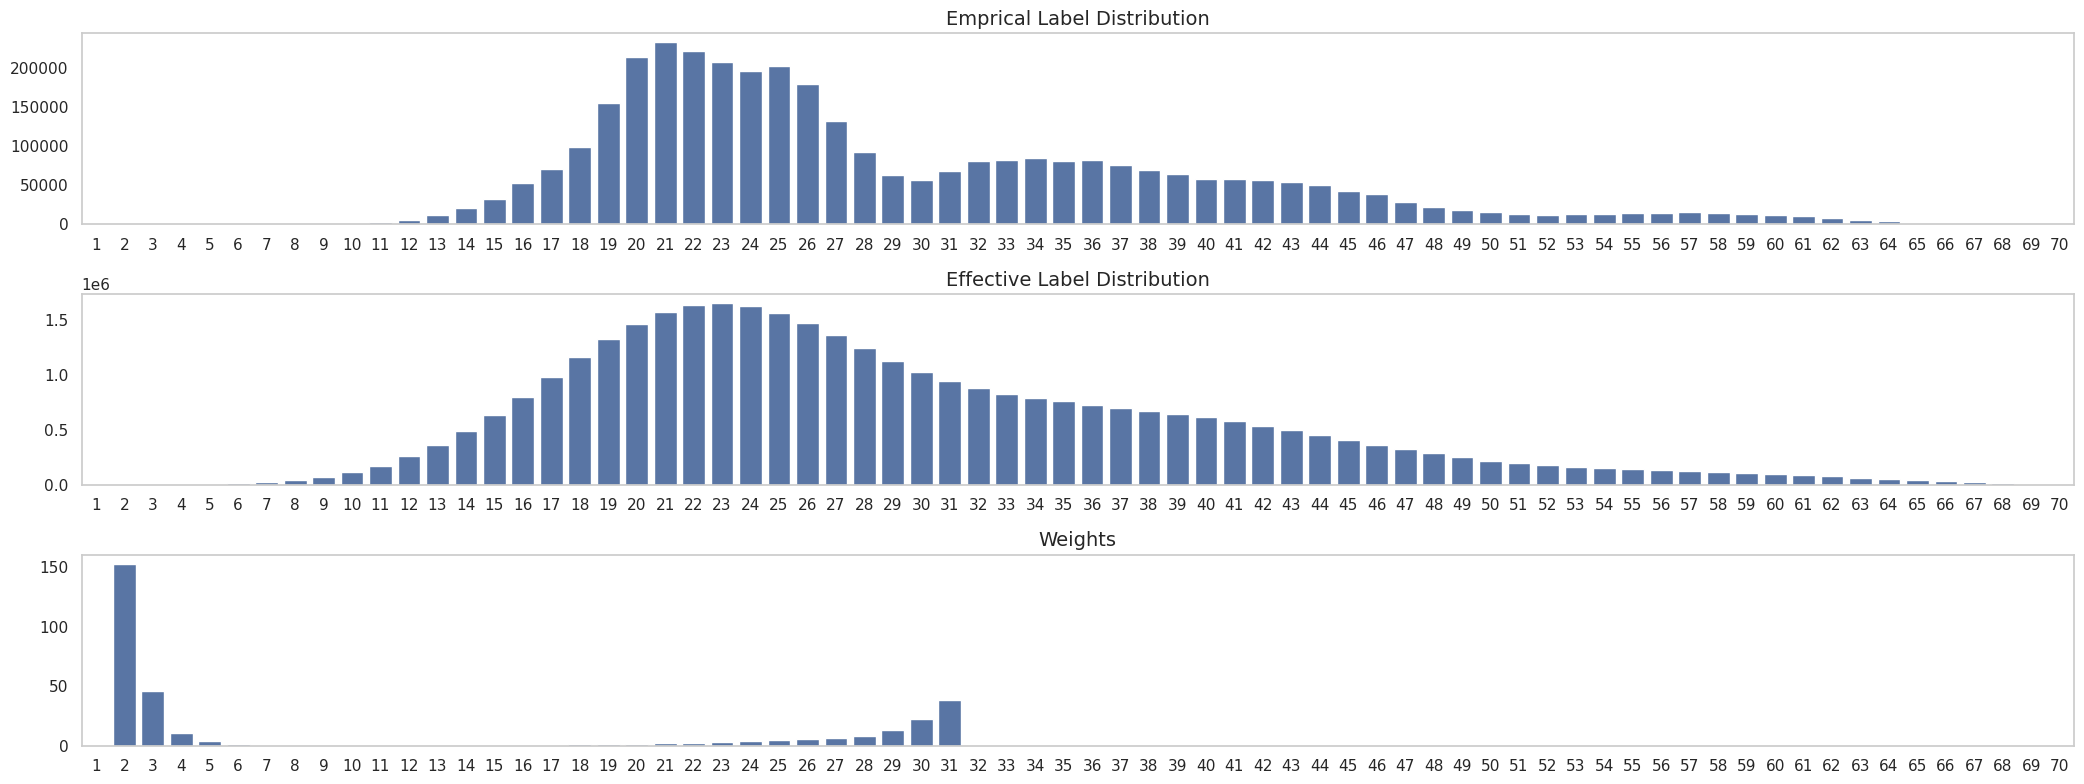

In [20]:
fig, axs = plt.subplots(3, 1 , figsize = (21, 8))

sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams["figure.autolayout"] = True
plt.subplots_adjust(hspace = 0.01)

bins_value  = np.arange(1, 71, 1)
ax1 = sns.barplot(x = bins_value, y = emperical_values, color = sns.color_palette()[0],  ax = axs[0]) #width = 0.9,
ax1.set_title("Emprical Label Distribution", fontsize = 14)

ax2 = sns.barplot(x = bins_value, y = effective_value, color = sns.color_palette()[0], ax = axs[1]) #width = 0.9, 
ax2.set_title("Effective Label Distribution", fontsize = 14)

ax3 = sns.barplot(x = bins_value, y = avg_weights, color = sns.color_palette()[0],  ax = axs[2]) #width = 0.9,
ax3.set_title('Weights', fontsize = 14)

In [14]:
RGB_test_LDS_sqinv    = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_004_001_05_RGB_LDS/004_001_05_RGB_LDS_test.csv',  index_col=0) 
RGB_test_LDS_inv      = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_005_001_05_RGB_inv_LDS/005_001_05_RGB_inv_LDS_test.csv',  index_col=0) 
RGB_test_LDS_inv_5_2  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_5_2/008_001_05_RGB_LDSinv_5_2_test.csv',  index_col=0) 
RGB_test_LDS_inv_5_4  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_5_4/008_001_05_RGB_LDSinv_5_4_test.csv',  index_col=0) 
RGB_test_LDS_inv_5_6  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_5_6/008_001_05_RGB_LDSinv_5_6_test.csv',  index_col=0) 
RGB_test_LDS_inv_5_8  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_5_8/008_001_05_RGB_LDSinv_5_8_test.csv',  index_col=0) 
RGB_test_LDS_inv_10_2 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_10_2/008_001_05_RGB_LDSinv_10_2_test.csv',  index_col=0) 
RGB_test_LDS_inv_10_4 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_10_4/008_001_05_RGB_LDSinv_10_4_test.csv',  index_col=0) 
RGB_test_LDS_inv_10_6 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_10_6/008_001_05_RGB_LDSinv_10_6_test.csv',  index_col=0) 
RGB_test_LDS_inv_10_8 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_10_8/008_001_05_RGB_LDSinv_10_8_test.csv',  index_col=0) 
RGB_test_LDS_inv_15_2 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_15_2/008_001_05_RGB_LDSinv_15_2_test.csv',  index_col=0) 
RGB_test_LDS_inv_15_4 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_15_4/008_001_05_RGB_LDSinv_15_4_test.csv',  index_col=0) 
RGB_test_LDS_inv_15_6 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_15_6/008_001_05_RGB_LDSinv_15_6_test.csv',  index_col=0) 
RGB_test_LDS_inv_15_8 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_15_8/008_001_05_RGB_LDSinv_15_8_test.csv',  index_col=0) 
RGB_test_LDS_inv_20_2 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_20_2/008_001_05_RGB_LDSinv_20_2_test.csv',  index_col=0) 
RGB_test_LDS_inv_20_4 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_20_4/008_001_05_RGB_LDSinv_20_4_test.csv',  index_col=0) 
RGB_test_LDS_inv_20_6 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_20_6/008_001_05_RGB_LDSinv_20_6_test.csv',  index_col=0) 
RGB_test_LDS_inv_20_8 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_20_8/008_001_05_RGB_LDSinv_20_8_test.csv',  index_col=0) 

In [16]:
RGB_test_LDS_sqinv_Output      = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_sqinv, th1 = 8, th2 = 22)
RGB_test_LDS_inv_Output        = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.74, MAPE = 0.13 | Cm: MAE = 1.49, MAPE = 11.43 | Cex: MAE = 4.71, MAPE = 29.12
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.84, MAPE = 0.14 | Cm: MAE = 1.73, MAPE = 13.32 | Cex: MAE = 3.16, MAPE = 22.01


In [17]:
RGB_test_LDS_inv_5_2_Output    = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_5_2, th1 = 8, th2 = 22)
RGB_test_LDS_inv_5_4_Output    = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_5_4, th1 = 8, th2 = 22)
RGB_test_LDS_inv_5_6_Output    = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_5_6, th1 = 8, th2 = 22)
RGB_test_LDS_inv_5_8_Output    = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_5_8, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.88, MAPE = 0.14 | Cm: MAE = 1.75, MAPE = 13.18 | Cex: MAE = 3.42, MAPE = 24.25
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.87, MAPE = 0.14 | Cm: MAE = 1.77, MAPE = 13.50 | Cex: MAE = 2.98, MAPE = 22.21
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.23, MAPE = 0.17 | Cm: MAE = 2.08, MAPE = 16.27 | Cex: MAE = 3.95, MAPE = 28.19
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.07, MAPE = 0.16 | Cm: MAE = 2.06, MAPE = 15.75 | Cex: MAE = 2.22, MAPE = 18.77


In [18]:
RGB_test_LDS_inv_10_2_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_10_2, th1 = 8, th2 = 22)
RGB_test_LDS_inv_10_4_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_10_4, th1 = 8, th2 = 22)
RGB_test_LDS_inv_10_6_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_10_6, th1 = 8, th2 = 22)
RGB_test_LDS_inv_10_8_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_10_8, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.23, MAPE = 0.17 | Cm: MAE = 2.11, MAPE = 16.53 | Cex: MAE = 3.62, MAPE = 24.49
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.24, MAPE = 0.19 | Cm: MAE = 2.07, MAPE = 17.39 | Cex: MAE = 4.19, MAPE = 35.14
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.12, MAPE = 0.16 | Cm: MAE = 2.07, MAPE = 15.82 | Cex: MAE = 2.74, MAPE = 20.58
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.80, MAPE = 0.14 | Cm: MAE = 1.74, MAPE = 13.26 | Cex: MAE = 2.42, MAPE = 17.11


In [19]:
RGB_test_LDS_inv_15_2_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_15_2, th1 = 8, th2 = 22)
RGB_test_LDS_inv_15_4_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_15_4, th1 = 8, th2 = 22)
RGB_test_LDS_inv_15_6_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_15_6, th1 = 8, th2 = 22)
RGB_test_LDS_inv_15_8_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_15_8, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.89, MAPE = 0.15 | Cm: MAE = 1.76, MAPE = 13.92 | Cex: MAE = 3.43, MAPE = 24.25
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.28, MAPE = 0.18 | Cm: MAE = 2.28, MAPE = 17.61 | Cex: MAE = 2.34, MAPE = 22.45
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.77, MAPE = 0.14 | Cm: MAE = 1.64, MAPE = 13.09 | Cex: MAE = 3.33, MAPE = 27.75
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.85, MAPE = 0.14 | Cm: MAE = 1.70, MAPE = 13.16 | Cex: MAE = 3.65, MAPE = 27.15


In [20]:
RGB_test_LDS_inv_20_2_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_20_2, th1 = 8, th2 = 22)
RGB_test_LDS_inv_20_4_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_20_4, th1 = 8, th2 = 22)
RGB_test_LDS_inv_20_6_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_20_6, th1 = 8, th2 = 22)
RGB_test_LDS_inv_20_8_Output   = Inference.eval_on_extreme_main_label_range_pred(RGB_test_LDS_inv_20_8, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 2.11, MAPE = 0.16 | Cm: MAE = 1.90, MAPE = 14.55 | Cex: MAE = 4.60, MAPE = 27.43
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.98, MAPE = 0.15 | Cm: MAE = 1.78, MAPE = 13.82 | Cex: MAE = 4.33, MAPE = 29.32
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.75, MAPE = 0.13 | Cm: MAE = 1.61, MAPE = 12.38 | Cex: MAE = 3.30, MAPE = 25.04
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.91, MAPE = 0.14 | Cm: MAE = 1.76, MAPE = 12.84 | Cex: MAE = 3.79, MAPE = 26.01


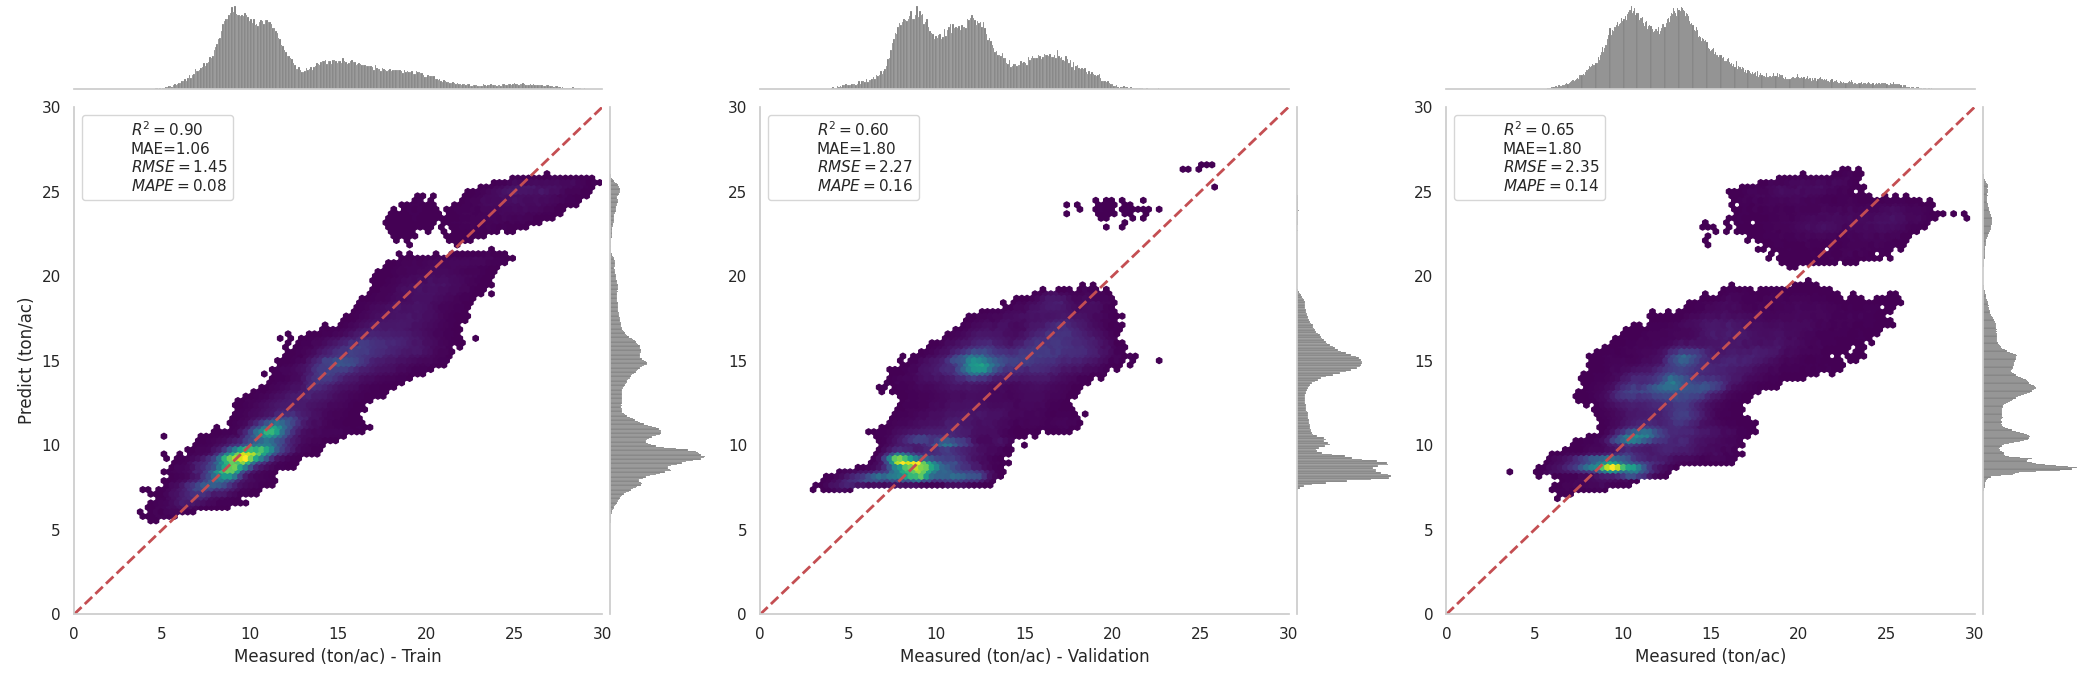

In [21]:
RGB_train_LDS_10_8 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_10_8/008_001_05_RGB_LDSinv_10_8_train.csv',  index_col=0) 
RGB_valid_LDS_10_8 = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_10_8/008_001_05_RGB_LDSinv_10_8_valid.csv',  index_col=0) 
RGB_test_LDS_10_8  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_008_001_05_RGB_LDSinv_10_8/008_001_05_RGB_LDSinv_10_8_test.csv',  index_col=0) 
_ = Inference.train_val_test_satterplot(RGB_train_LDS_10_8, RGB_valid_LDS_10_8, RGB_test_LDS_10_8, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

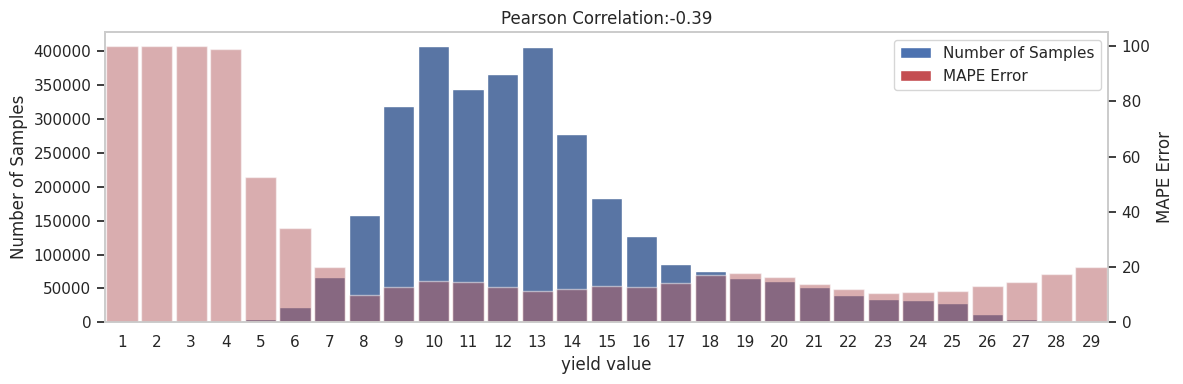

In [22]:
_ = Inference.Erroe_hist_visulization_V2(RGB_test_LDS_10_8)

### Class Balanced 

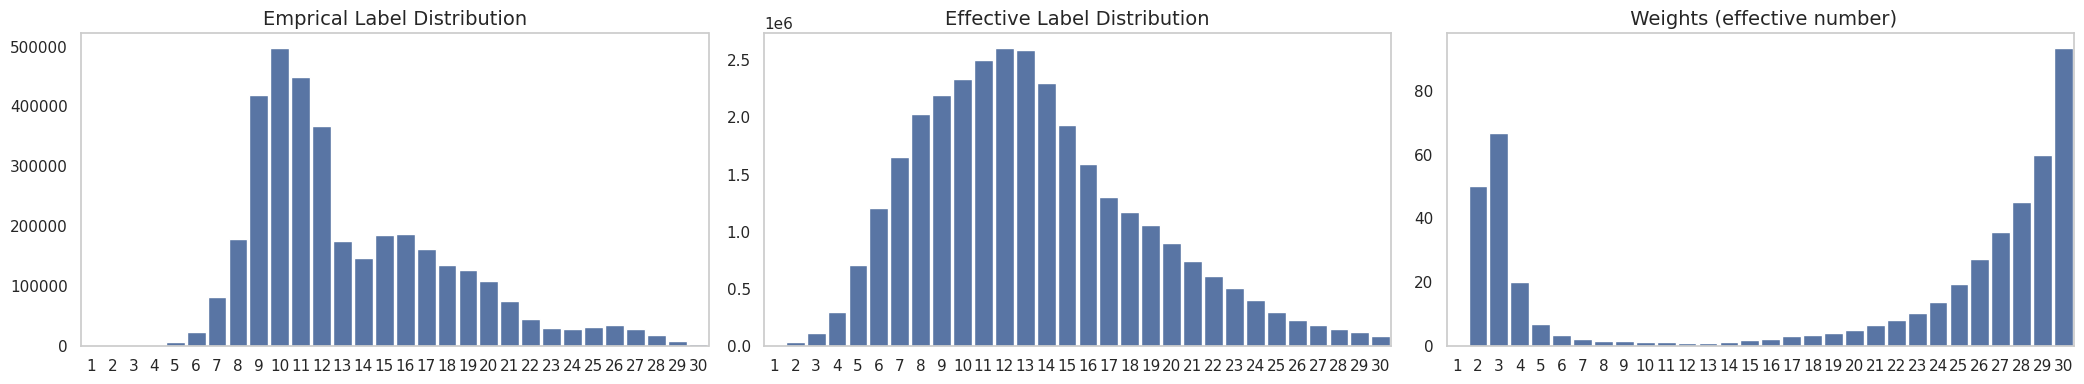

In [15]:
df = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_005_001_05_RGB_inv_LDS/coords/train.csv', index_col= 0)
weights, labels_, effective_value, emperical_values, avg_weights = RWSampler.check_cb_reweighting(df,  
                                                                    lds_ks = 10, 
                                                                    lds_sigma = 8, 
                                                                    betha = 4).return_pixelwise_weight()
_ = utils.triple_emp_effective_weights_hist_plot(emperical_values, effective_value, avg_weights, method = 'effective number') 

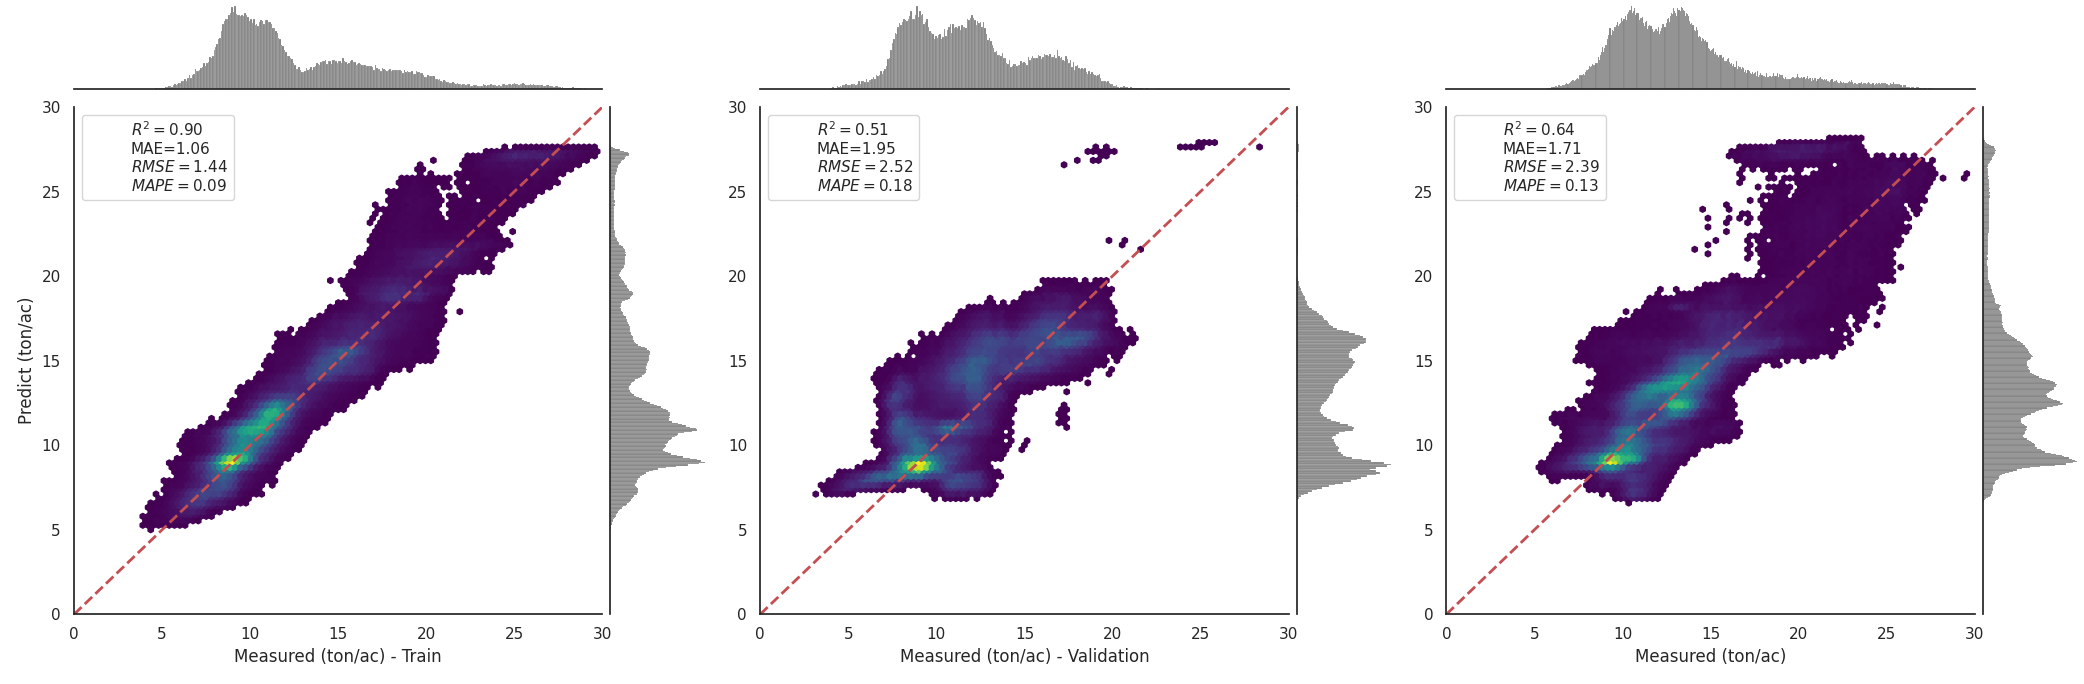

In [25]:
RGB_train_CB = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_CB_3/012_64_001_05_RGB_CB_3_train.csv',  index_col=0) 
RGB_valid_CB = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_CB_3/012_64_001_05_RGB_CB_3_valid.csv',  index_col=0) 
RGB_test_CB = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_CB_3/012_64_001_05_RGB_CB_3_test.csv',  index_col=0) 
_ = Inference.train_val_test_satterplot(RGB_train_CB, RGB_valid_CB, RGB_test_CB, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

In [12]:
RGB_test_cost_sensitive_Output_CB = Inference.eval_on_three_main_label_range_pred(RGB_test_CB, th1 = 9.3, th2 = 15.7)
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_CB, th1 = 8, th2 = 22)

C1 num samples: 333919 | C2 num samples: 2179712 | C3 num samples: 671777 
C1 is yield value between 0 and 9.3, C2 is yield value between 9.3 and 15.7, and C3 is yield value bigger than 15.7
All: MAE = 1.71, MAPE = 0.13 | C1: MAE = 1.60, MAPE = 20.55 | C2: MAE = 1.46, MAPE = 12.13 | C3: MAE = 2.56, MAPE = 13.13
Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.71, MAPE = 0.13 | Cm: MAE = 1.64, MAPE = 12.64 | Cex: MAE = 2.45, MAPE = 20.13


In [ ]:
RGB_train_CB = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_012_64_001_05_RGB_CB_4/012_64_001_05_RGB_CB_4_train.csv',  index_col=0) 